### 데이터 가져오기

In [1]:
domi_len = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
domi_wgt = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
bing_len = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
bing_wgt = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 독립변수 데이터 합치기
fish_length = []
fish_weight = []

fish_length = domi_len + bing_len
fish_weight = domi_wgt + bing_wgt


### 넘파이로 2차원데이터 생성

In [2]:
import numpy as np

In [3]:
fish_data = []
for x,y in zip (fish_length, fish_weight):
    fish_data.append([x,y])

In [5]:
# 넘파이로 2차원 독립변수 생성
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
fish_target = [] 
fish_target = [1] * 35 + [0] * 14

In [7]:
# 넘파이로 종속변수 생성
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 넘파이로 훈련/테스트 데이터 분리하기
#### 데이터를 분리와 섞는 작업을 동시에 진행

In [8]:
# 사이킷런 패키지 중에 훈련 및 데스트 데이터 분리 함수 사용
from sklearn.model_selection import train_test_split

In [23]:
# 입력 값 : train_test_split(독립변수 데이터셋, 종속변수 데이터셋, test_size=데이터 분류비율, random_state=랜덤고정 값, stratify = 종속변수 데이터로 균등하게 분리fish_target)
# 반환 값 : 훈련 독립변수, 테스트 독립변수 , 훈련 종속변수, 테스트 종속변수
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.25, random_state=42)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [14]:
train_target

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0.])

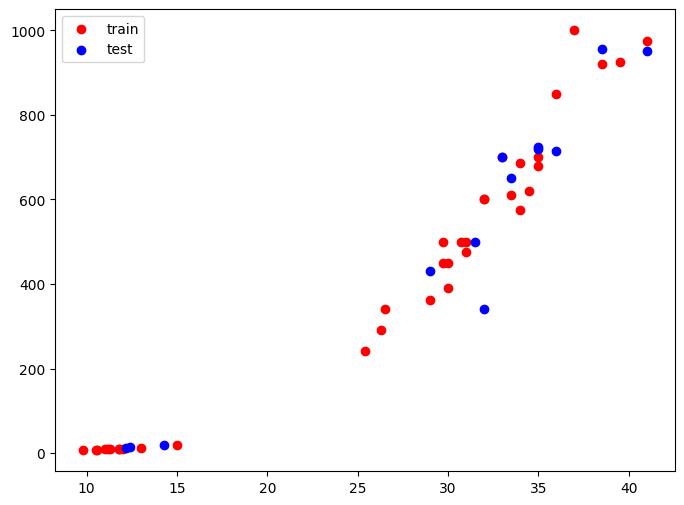

In [24]:
# 훈련 및 테스트데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

# 첫번째열은 길이 두번째열은 무게
plt.scatter(train_input[: , 0],train_input[:,1], color='red', label = 'train')
plt.scatter(test_input[: , 0],test_input[:, 1], color='blue', label = 'test')
plt.legend()
plt.show()

### 데이터 편향을 개선
#### 데이터의 편향 확인 : 종속데이터 확인하면 됨
#### train_test_split의 stratify=fish_target을 이용해 편향성을 보정

In [16]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size=0.25, random_state=42, stratify=fish_target)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [27]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### 임의의 데이터 예측(분류)하기
#### 임의의 데이터 : 길이는 25, 무게는 150인 경우 어떤 생선일까?

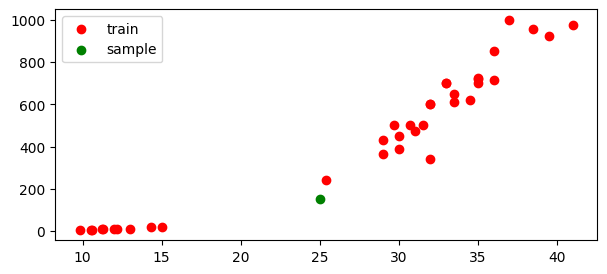

In [40]:
# 훈련 및 테스트, 임의의 데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))

# 첫번째열은 길이 두번째열은 무게
plt.scatter(train_input[: , 0],train_input[:,1], color='red', label = 'train')
#plt.scatter(test_input[: , 0],test_input[:, 1], color='blue', label = 'test')
plt.scatter(25,150, color='green', label = 'sample')
plt.legend()
plt.show()

In [33]:
# 훈련시키기(훈련데이터 사용), 이웃갯수는 기본값 5
from sklearn.neighbors import KNeighborsClassifier as KNN
knn3 = KNN()
knn3.fit(train_input, train_target)

KNeighborsClassifier()

In [34]:
# 정확도 확인하기(테스트데이터 사용)
knn3.score(test_input, test_target)

1.0

In [35]:
# 예측하기(임의 데이터)
knn3.predict([[25,150]])

# 해석 : 0은 빙어를 의미함

array([0.])

### 사용된 이웃 확인

In [43]:
# knn3.kneighbors([[25,150]])의 반환값 = dist :이웃까지의 거리값, idx : 실제 독립변수의 인덱스 값 
dist, idx = knn3.kneighbors([[25,150]])

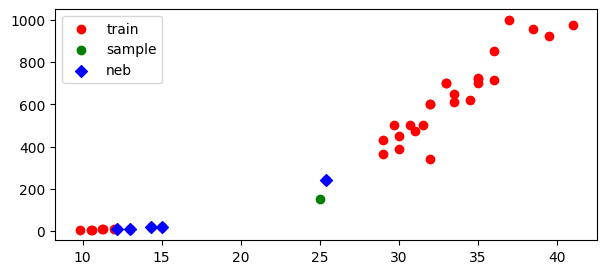

In [44]:
# 훈련 및 테스트, 임의의 데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))

# 첫번째열은 길이 두번째열은 무게
plt.scatter(train_input[: , 0],train_input[:,1], color='red', label = 'train')
#plt.scatter(test_input[: , 0],test_input[:, 1], color='blue', label = 'test')
plt.scatter(25,150, color='green', label = 'sample')

# 이웃의 특성 확인하기
plt.scatter(train_input[idx,0], train_input[idx,1], color='blue', label = 'neb', marker='D')

plt.legend()
plt.show()

In [45]:
# 인덱스로 실제 종속변수 데이터 확인하기
train_target[idx]

array([[1., 0., 0., 0., 0.]])

### 왜 빙어로 분류됐을까
#### x축과 y축 단위가 커서 발생한 현상으로 단위를 동일하게 한 후 확인

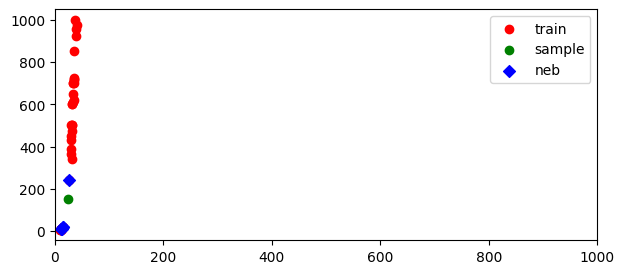

In [47]:
# 훈련 및 테스트, 임의의 데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))

# x축의 단위를 y축 단위로 변환해서 산점도그리기
plt.xlim(0,1000)

plt.scatter(train_input[: , 0],train_input[:,1], color='red', label = 'train')
#plt.scatter(test_input[: , 0],test_input[:, 1], color='blue', label = 'test')
plt.scatter(25,150, color='green', label = 'sample')

# 이웃의 특성 확인하기
plt.scatter(train_input[idx,0], train_input[idx,1], color='blue', label = 'neb', marker='D')

plt.legend()
plt.show()

### 데이터 스케일링 : 정규화(표준화)라고 칭함
#### 정규화 : 표준점수(standard score)를 사용
#### 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차만큼 떨어져 있는지를 나타냄
#### 표준점수 = (각 데이터 - 데이터셋 전체평균) / 데이터셋 전체 표준편차
#### 편균 및 표준편차는 numpy함수 사용

In [48]:
# 길이와 무게의 각각 평균 구하기
mean = np.mean(train_input, axis = 0)
mean

array([ 27.29722222, 454.09722222])

In [49]:
# 길이와 무게의 각각 표준편차 구하기
std = np.std(train_input, axis=0)
std

array([  9.98244253, 323.29893931])

In [53]:
# 표준점수 계산하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [57]:
# 임의의 데이터 표준화
new = ([25,150]-mean)/std

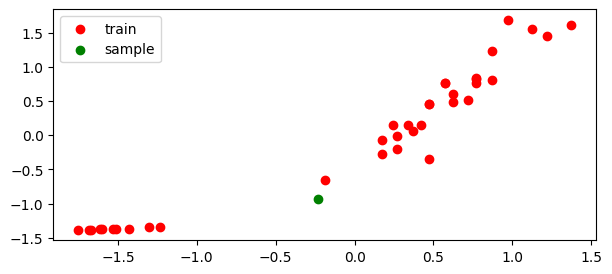

In [58]:
# 정규화, 임의의 데이터를 산점도로 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))

# x축의 단위를 y축 단위로 변환해서 산점도그리기
plt.scatter(train_scaled[: , 0],train_scaled[:,1], color='red', label = 'train')

#임의의 데이터 표준ㅇ화
plt.scatter(new[0],new[1], color='green', label = 'sample')

plt.legend()
plt.show()

In [ ]:
# 훈련하기
# 정확도확인 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn4 = KNN()
knn4.fit(train_scaled, train_target)